# Purpose
This notebook will use functions from `../plot_calibration.py` to plot calibrations of bnn trained on different datasets, and compare the BNNs' performances against each other when tested on the same test set. The main purposes of this are:

1. To see how BNN perfomance differs as it's trained on different datasets
2. To have a record of BNN performance so that after having programmed the hierarchical inference step, we can see how BNN *with* hierarchical inference performs against BNN *without* hierarchical inference

### setups

In [1]:
# importing functions from plot_calibration.py
import sys
sys.path.insert(1, '../')
import plot_calibration as pc
from IPython.display import Image
import joblib as jl
import numpy as np
from chainconsumer import ChainConsumer

2022-12-21 10:21:37.941423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 10:21:38.177095: W tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 10:21:38.177112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 10:21:39.079495: W tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libnvinfer.so.8'; dlerror: libnvinfer.so.8: cannot open shared object file: No such file or directory
2022-12-21 10:21:39.079714: W tensorflow/tsl/platform/default/dso_loader.cc:66] 

In [2]:
pc.plot_pretty()
model = pc.get_model()

/home/mathilda/.local/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
2022-12-21 10:21:42.979689: W tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-21 10:21:42.979706: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 10:21:42.979720: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mathilda-timstaller): /proc/driver/nvidia/version does not exist
2022-12-21 10:21:42.979890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)

`uniform_bnn_h5_path` is the path that holds the weights of bnn trained on original parameters `{"PA":[0., 180.], "I_sky":22.23, "ell":[0.05, 0.7], "n":[0.5, 1.5], "I_e":[24.3, 25.5], "r_e":[2.5, 6.0]}`. During the generation phase of this dataset, each parameters were sampled from uniform distribution.

`gaussian_bnn_h5_path` is the path that hold the weights of bnn trained on original parameters also. The difference is, during the generation phase of this dataset, each parameters were sampled from gaussian distribution. 

`_motherpath`: are path to test sets, training sets, ....etc

In [3]:
original_bnn_h5_path = '../../data_stash/out_data/WC_plot_dataset/uniform_weight.h5'
original_bnn_motherpath = '../../data_stash/out_data/WC_plot_dataset/uniform/'
gaussian_bnn_h5_path = '../../bnn_codes/train_out/gaussian/_BNN_weight.h5'
gaussian_bnn_motherpath = '../../data_stash/out_data/WC_plot_dataset/gaussian/'

In [3]:
def plot_one_chain(sample, y_keep, saved_name: str, num:int):
    c = ChainConsumer()
    c.add_chain(sample[num],parameters=["PA", "ell", "n", "I_e", "r_e"])
    fig = c.plotter.plot(figsize=(8,8), truth=y_keep[num], filename=f"no_inference_plots/one_chain_{saved_name}_{num}")

In [3]:
# def plot_two_chains(target, num:int):
#     if target=='uniform':
#         bnn1 = uniform_samples
#         bnn2 = gaussian_samples_on_uniform
#     elif target=='gaussian':
#         bnn1 = uniform_samples_on_gaussian
#         bnn2 = gaussian_samples
#     #sample_new_single_source = scaler.inverse_transform(np.asarray(bnn1[:,num,:]))
#     #sample_new_single_target = scaler.inverse_transform(np.asarray(bnn2[:,num,:]))
#     c = ChainConsumer()
#     c.add_chain(bnn1[num],parameters=["PA", "ell", "n", "I_e", "r_e"], name='uniform', color='red')
#     c.add_chain(bnn2[num],parameters=["PA", "ell", "n", "I_e", "r_e"], name='gaussian', color='blue')
#     fig = c.plotter.plot(figsize=(8,8), truth=y_keep[num], filename=f"no_inference_plots/two_chains_on_{target}_{num}")

# main
Here we do a few things:
1. test bnn that was trained on original (uniform) dataset, on original (uniform) dataset
2. test bnn that was trained on gaussian dataset, on gaussian dataset
3. test bnn that was trained on original (uniform) dataset, on gaussian dataset
4. test bnn that was trained on gaussian dataset, on original (uniform) dataset
5. test bnn that was trained on original (uniform) dataset, on out-of-distribution dataset (do after meeting this week)
6. test bnn that was trained on gaussian dataset, on out-of-distribution dataset (do after meeting this week)

save all of the above into `no_inference_samples/` directory

In [4]:
# original bnn, test on original
inverted_uniform_samples, uniform_y_keep, _ = pc.main(model, original_bnn_h5_path, original_bnn_motherpath)
jl.dump(tuple([inverted_uniform_samples, uniform_y_keep]), 'no_inference_samples/uniform_samples.jl')

['no_inference_samples/uniform_samples.jl']

In [4]:
# gaussian bnn, test on gaussian
inverted_gaussian_samples, gaussian_y_keep, _ = pc.main(model, gaussian_bnn_h5_path, gaussian_bnn_motherpath)
jl.dump(tuple([inverted_gaussian_samples, gaussian_y_keep]), 'no_inference_samples/gaussian_samples.jl')

['no_inference_samples/gaussian_samples.jl']

In [4]:
# original bnn, test on gaussian
inverted_uniform_on_gaussian, uniform_on_gaussian_y_keep, _ = pc.main(model, original_bnn_h5_path, gaussian_bnn_motherpath)
jl.dump(tuple([inverted_uniform_on_gaussian, uniform_on_gaussian_y_keep]), 'no_inference_samples/uniform_samples_on_gaussian.jl')

['no_inference_samples/uniform_samples_on_gaussian.jl']

In [4]:
# gaussian bnn, test on original
inverted_gaussian_on_uniform, gaussian_on_uniform_y_keep, _ = pc.main(model, gaussian_bnn_h5_path, original_bnn_motherpath)
jl.dump(tuple([inverted_gaussian_on_uniform, gaussian_on_uniform_y_keep]), 'no_inference_samples/gaussian_samples_on_uniform.jl')

['no_inference_samples/gaussian_samples_on_uniform.jl']

reimport

In [4]:
inv_uniform_samples, uniform_y_keep = jl.load('no_inference_samples/uniform_samples.jl')
inv_gaussian_samples, gaussian_y_keep = jl.load('no_inference_samples/gaussian_samples.jl')
inv_uniform_against_gaussian, uniform_v_gaussian_y_keep = jl.load('no_inference_samples/uniform_samples_on_gaussian.jl')
inv_gaussian_against_uniform, gaussian_v_uniform_y_keep = jl.load('no_inference_samples/gaussian_samples_on_uniform.jl')

# plots
1. One plot (all are tested on image index 100):

    i. bnn trained on uniform, test on uniform
    
    ii. bnn trained on uniform, test on gaussian
    
    iii. bnn trained on gaussian, test on gaussian
    
    iv. bnn trained on gaussian, test on uniform
    
2. Two plots:

    i. bnn's trained on (1) uniform (2) gaussian, test on uniform
    
    ii. bnn's trained on (1) uniform (2) gaussian, test on gaussian

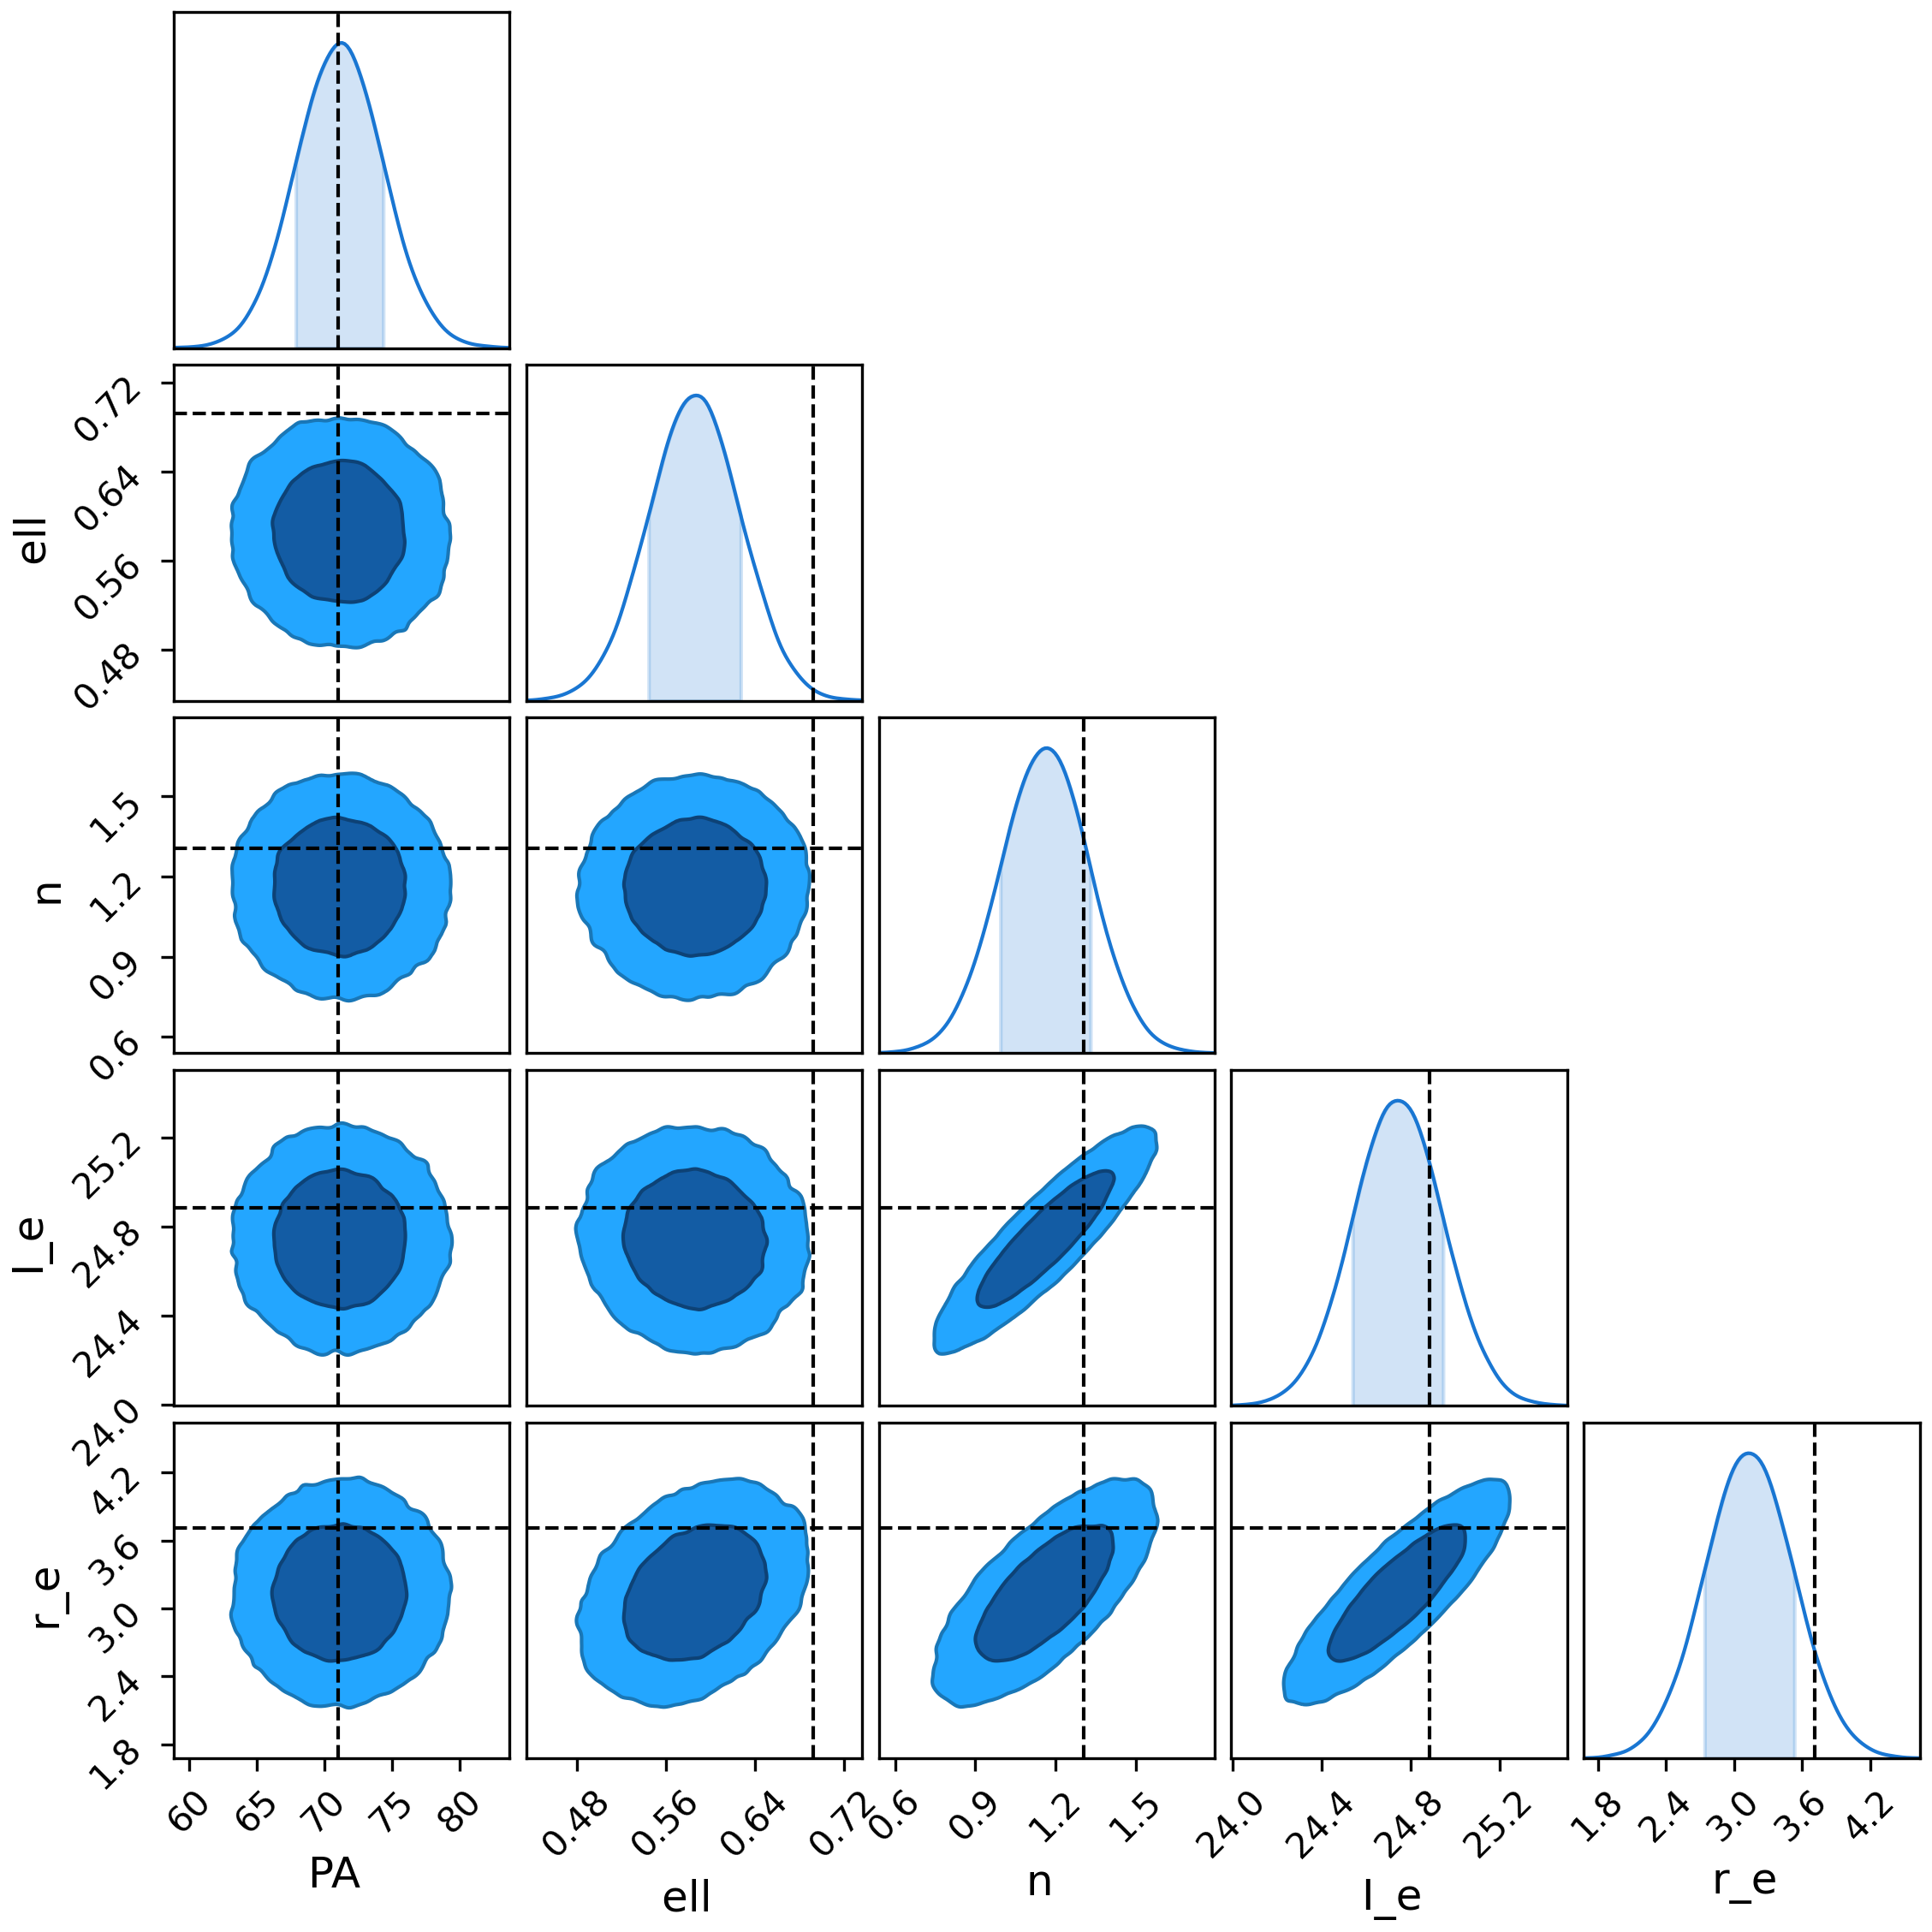

In [6]:
plot_one_chain(inv_uniform_samples, uniform_y_keep, 'uniform_uniform', 100)
Image(filename='no_inference_plots/one_chain_uniform_uniform_100.png') 

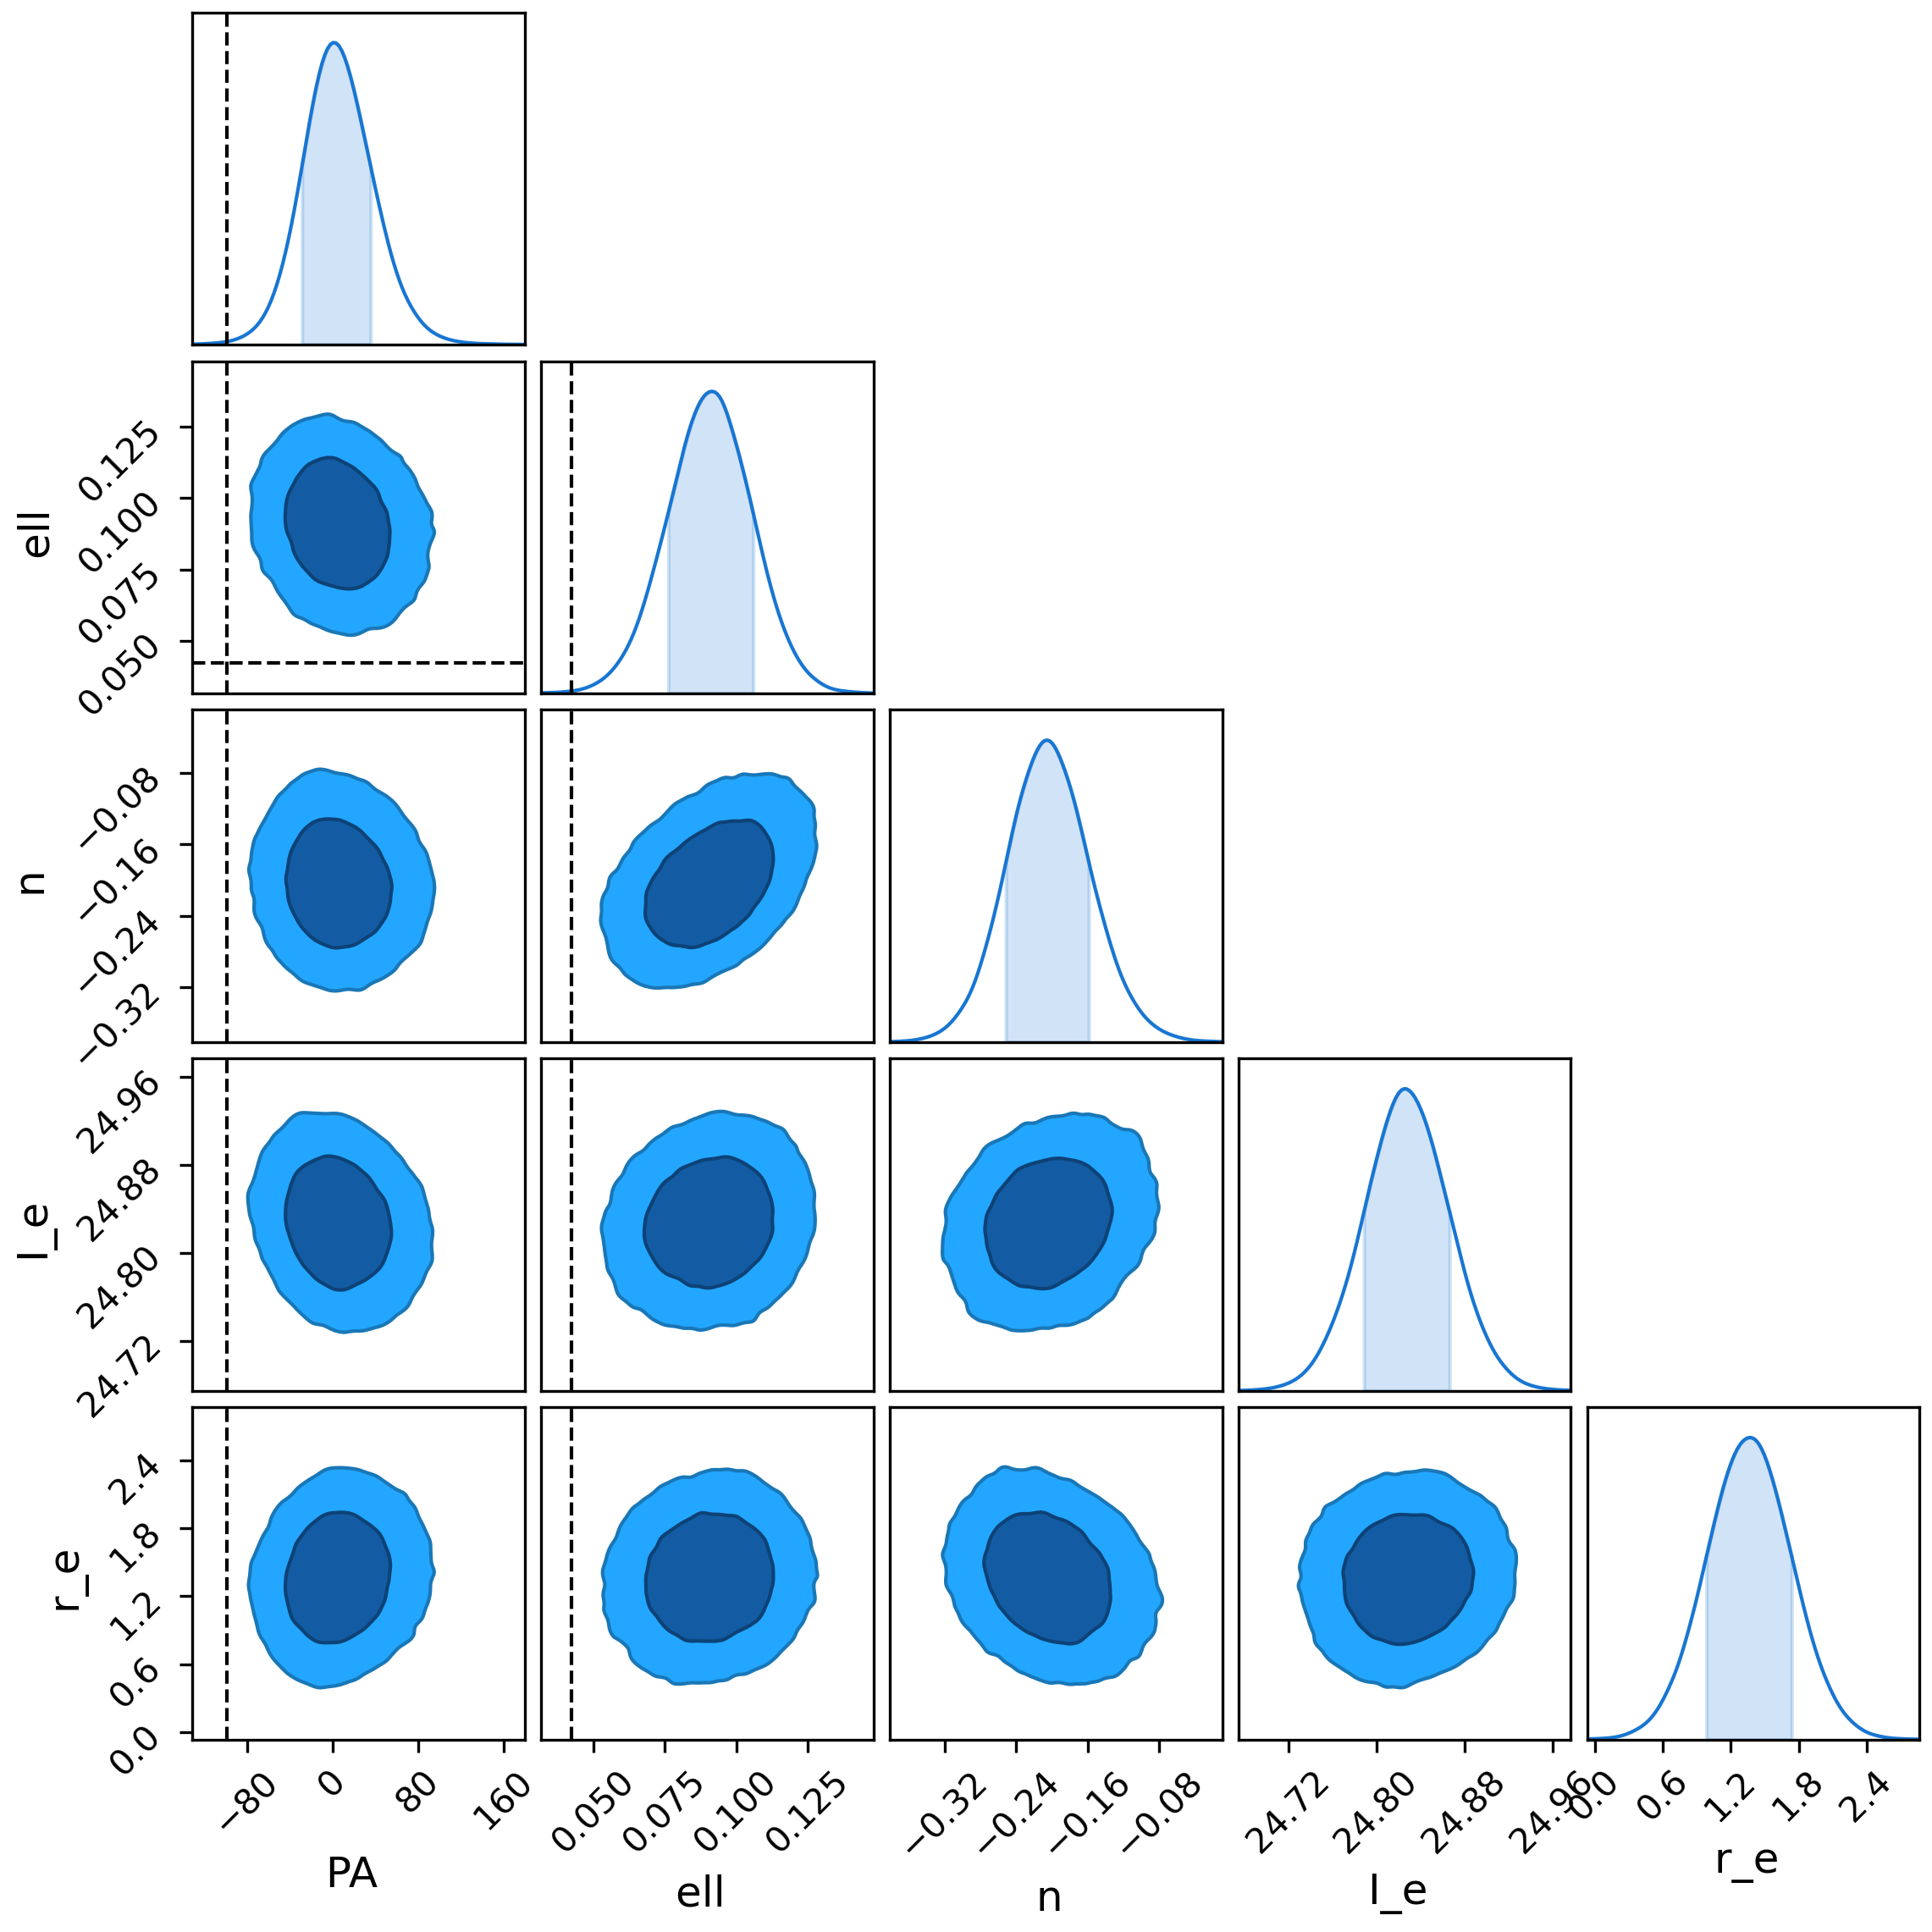

In [10]:
plot_one_chain(inv_uniform_against_gaussian, uniform_v_gaussian_y_keep, 'uniform_gaussian', 100)
Image(filename='no_inference_plots/one_chain_uniform_gaussian_100.png') 

In [11]:
plot_one_chain(inv_gaussian_samples, gaussian_y_keep, 'gaussian_gaussian', 1)
Image(filename='no_inference_plots/one_chain_gaussian_gaussian_1.png') 

AssertionError: Data for chain Chain 0, parameter PA is being used, but has either NaNs or infs in it!

In [ ]:
inv_gaussian_samples[inv_gaussian_samples!=None]